In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('movie_success_rate.csv')

Lets Visualise our dataset first!

In [5]:
df.shape

(839, 33)

In [6]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [8]:
df['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64

In [9]:
df['Director'].value_counts()

Ridley Scott          8
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Antoine Fuqua         5
                     ..
Kyle Balda            1
Chris Renaud          1
Peter Billingsley     1
Lee Toland Krieger    1
Nima Nourizadeh       1
Name: Director, Length: 524, dtype: int64

In [10]:
df['Actors'].value_counts()

Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                   1
                                                                      ..
Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris                      1
Chloë Grace Moretz, Matthew Zuk, Gabriela Lopez,Bailey Anne Borders    1
Olivia DeJonge, Ed Oxenbould, Deanna Dunagan, Peter McRobbie           1
Vin Diesel, Paul Walker, Dwayne Johnson, Jordana Brewster              1
Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines               1
Name: Actors, Length: 834, dtype: int64

Heatmap to visualize the missing values in a DataFrame df

<Axes: >

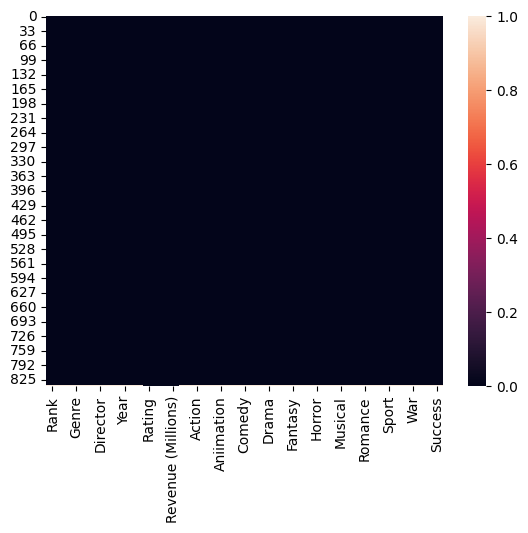

In [11]:
import seaborn as sns
sns.heatmap(df.isnull())

 fill missing values in the DataFrame df with the median value of each column.

In [12]:
df = df.fillna(df.median())

<ipython-input-12-a187aa03e3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


# Visualizing feature's importance to Movie Sucess!

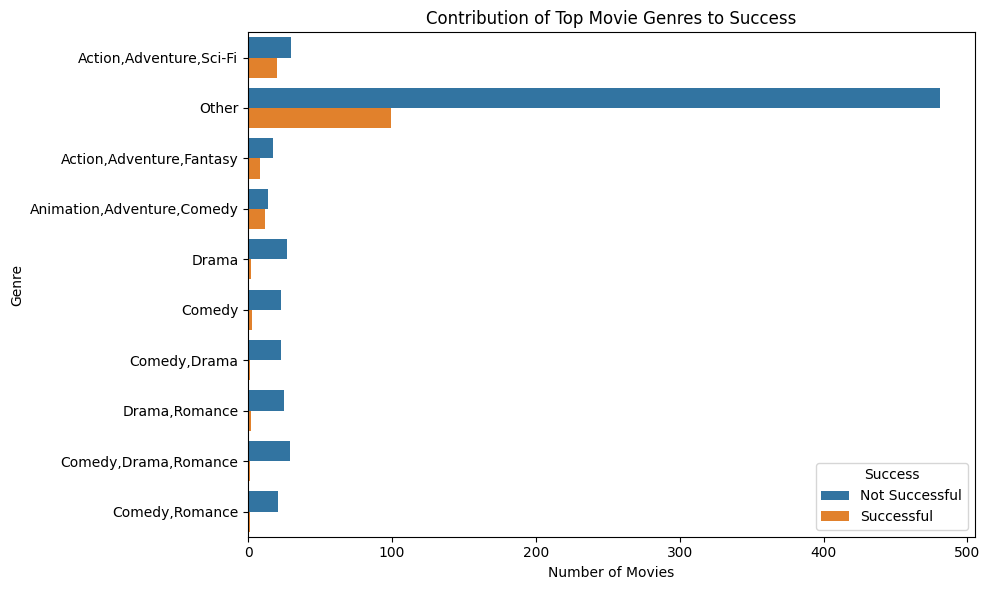

In [42]:
import matplotlib.pyplot as plt
top_genres = df['Genre'].value_counts().nlargest(10).index
df['Genre'] = df['Genre'].apply(lambda x: x if x in top_genres else 'Other')
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', hue='Success', data=df, orient='h')
plt.title('Contribution of Top Movie Genres to Success')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.legend(title='Success', labels=['Not Successful', 'Successful'])
plt.tight_layout()
plt.show()


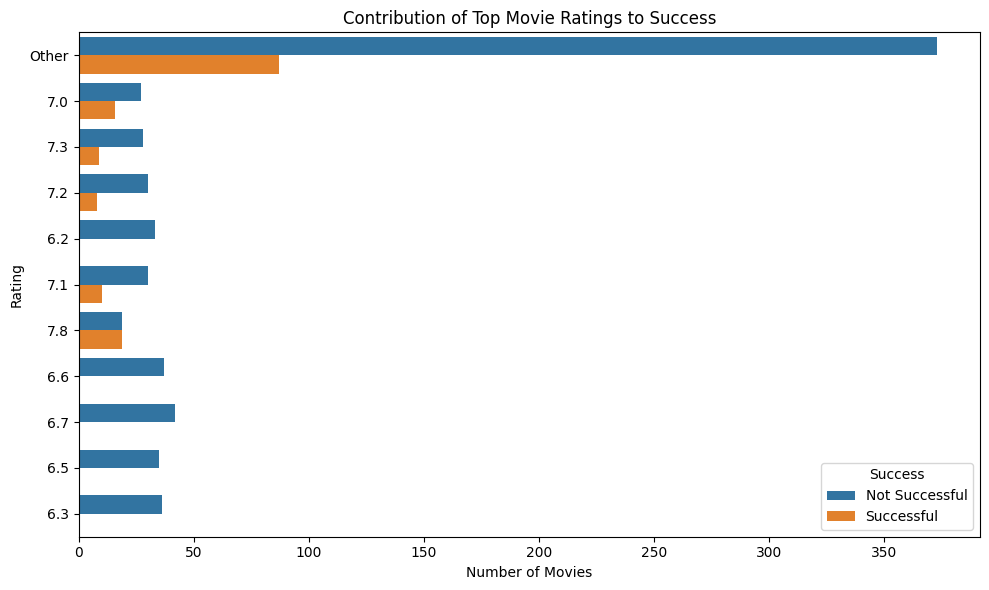

In [43]:
top_ratings = df['Rating'].value_counts().nlargest(10).index
df['Rating'] = df['Rating'].apply(lambda x: x if x in top_ratings else 'Other')
plt.figure(figsize=(10, 6))
sns.countplot(y='Rating', hue='Success', data=df, orient='h')
plt.title('Contribution of Top Movie Ratings to Success')
plt.xlabel('Number of Movies')
plt.ylabel('Rating')
plt.legend(title='Success', labels=['Not Successful', 'Successful'])
plt.tight_layout()
plt.show()


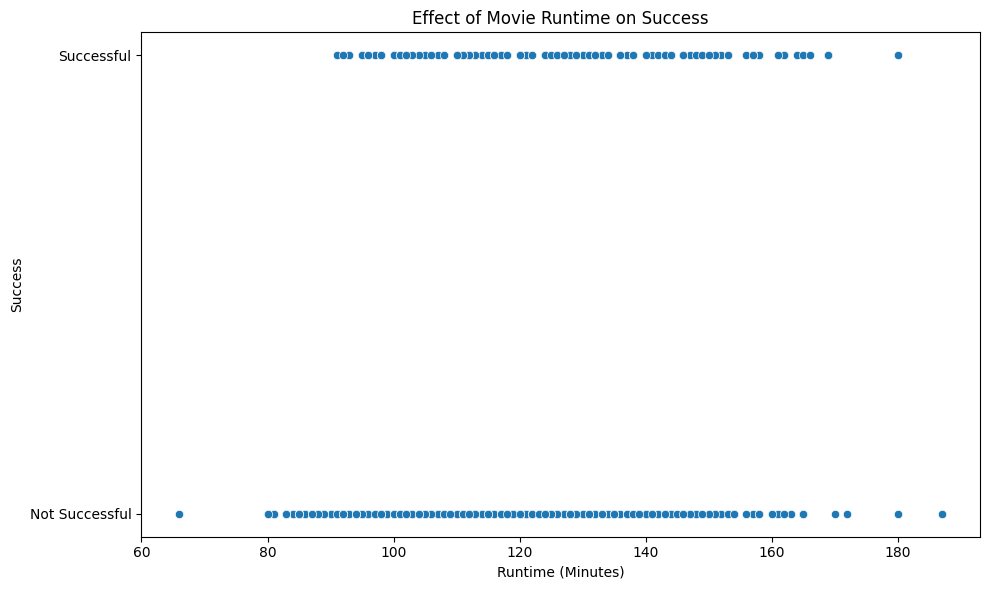

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime (Minutes)', y='Success', data=df)
plt.title('Effect of Movie Runtime on Success')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Success')
plt.yticks([0, 1], ['Not Successful', 'Successful'])
plt.tight_layout()
plt.show()


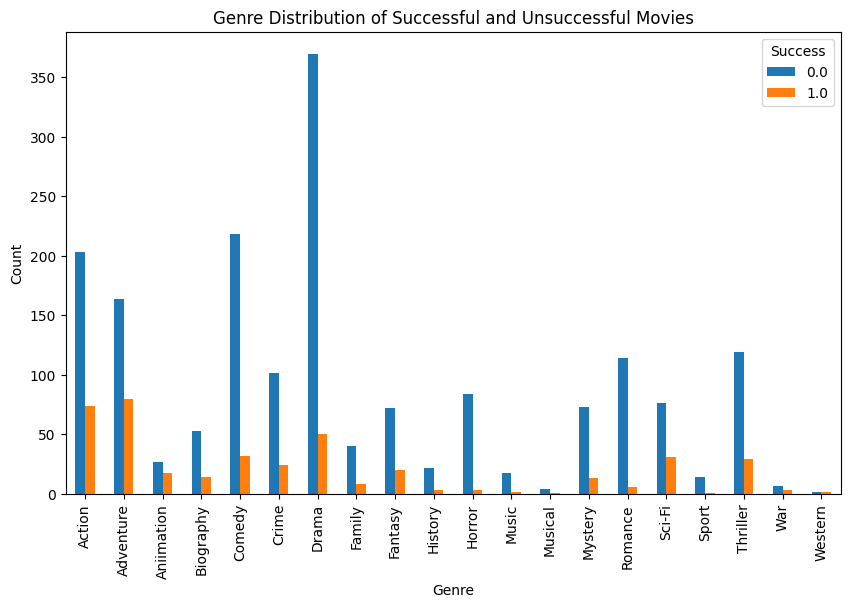

In [55]:
genre_success_counts = df.groupby('Success')[selected_features[6:]].sum().T
genre_success_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Genre Distribution of Successful and Unsuccessful Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


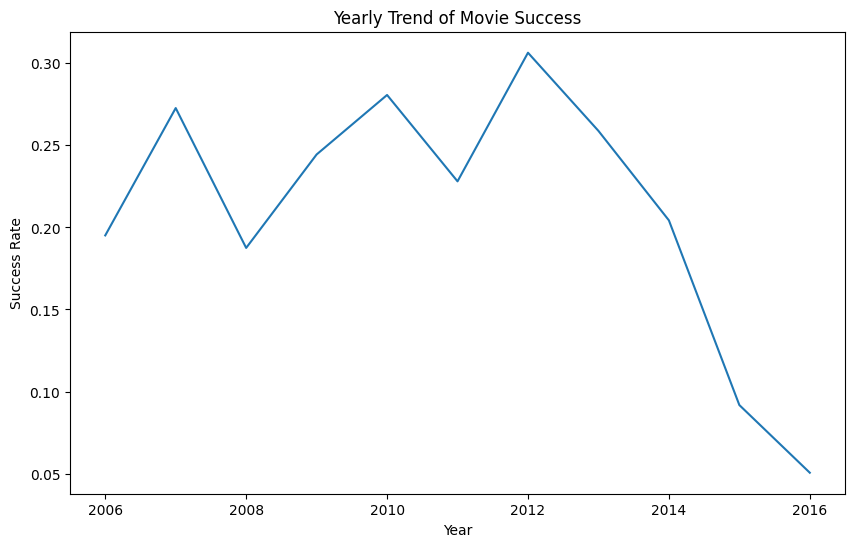

In [58]:
yearly_success = df.groupby('Year')['Success'].mean()
plt.figure(figsize=(10, 6))
yearly_success.plot(kind='line')
plt.title('Yearly Trend of Movie Success')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()


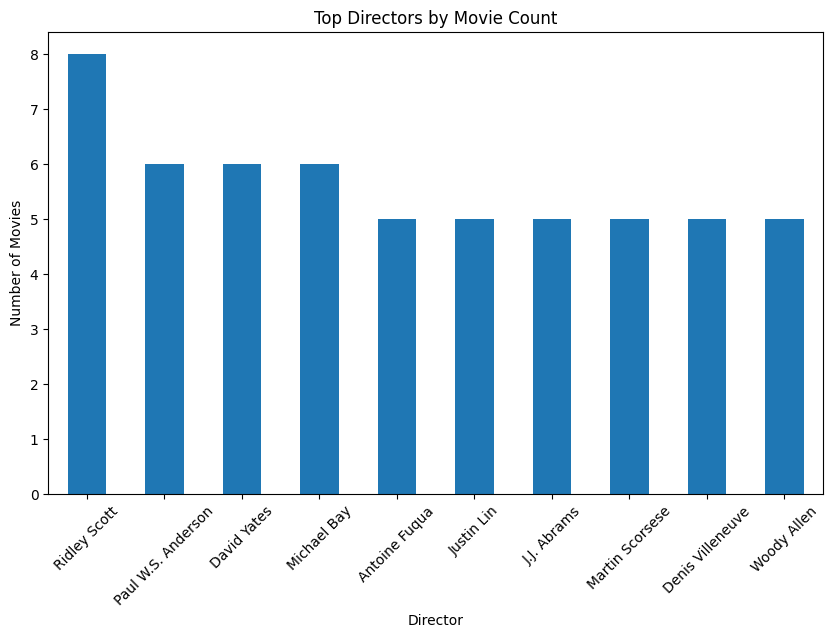

In [66]:
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar')
plt.title('Top Directors by Movie Count')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


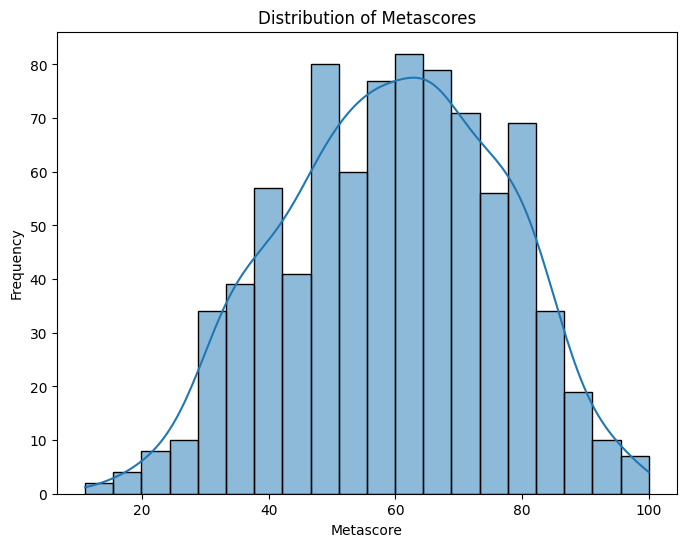

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Metascore', bins=20, kde=True)
plt.title('Distribution of Metascores')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()


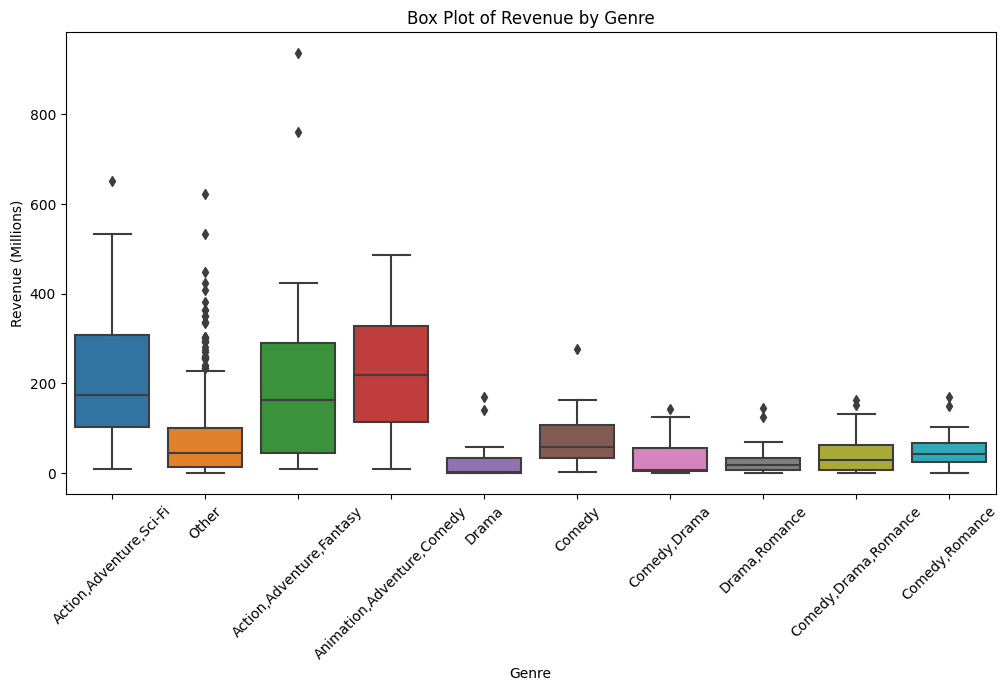

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Revenue (Millions)', data=df)
plt.title('Box Plot of Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()


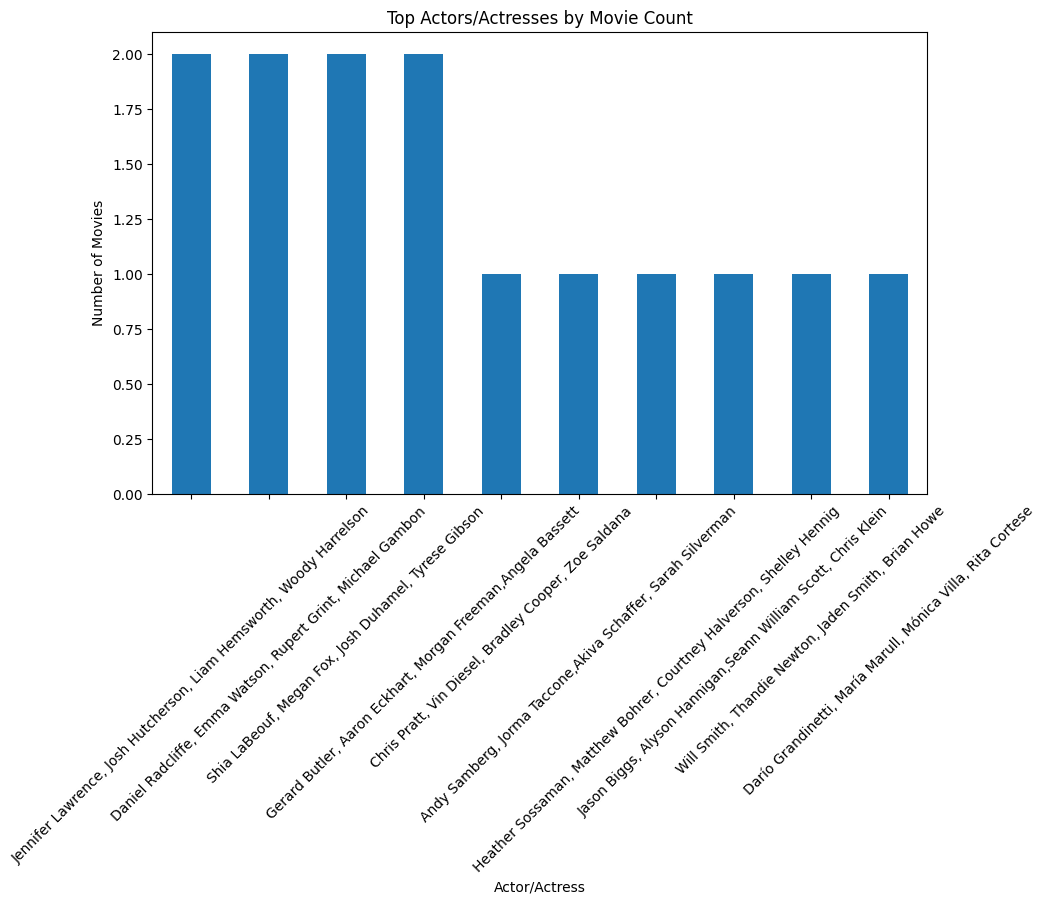

In [69]:
top_actors = df['Actors'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar')
plt.title('Top Actors/Actresses by Movie Count')
plt.xlabel('Actor/Actress')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [13]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [14]:
x = df[['Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]
y = df['Success']


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,stratify=y)

               Feature  Importance
4   Revenue (Millions)    0.318869
3                Votes    0.261273
2               Rating    0.167333
1    Runtime (Minutes)    0.063548
5            Metascore    0.051923
0                 Year    0.029554
12               Drama    0.022154
7            Adventure    0.016842
6               Action    0.014296
8           Aniimation    0.007360
21              Sci-Fi    0.004747
10              Comedy    0.004658
11               Crime    0.004302
20             Romance    0.004260
14             Fantasy    0.004187
16              Horror    0.003721
13              Family    0.003465
9            Biography    0.003313
22               Sport    0.002976
15             History    0.002726
23            Thriller    0.002702
19             Mystery    0.002294
25             Western    0.001633
24                 War    0.001228
17               Music    0.000459
18             Musical    0.000177


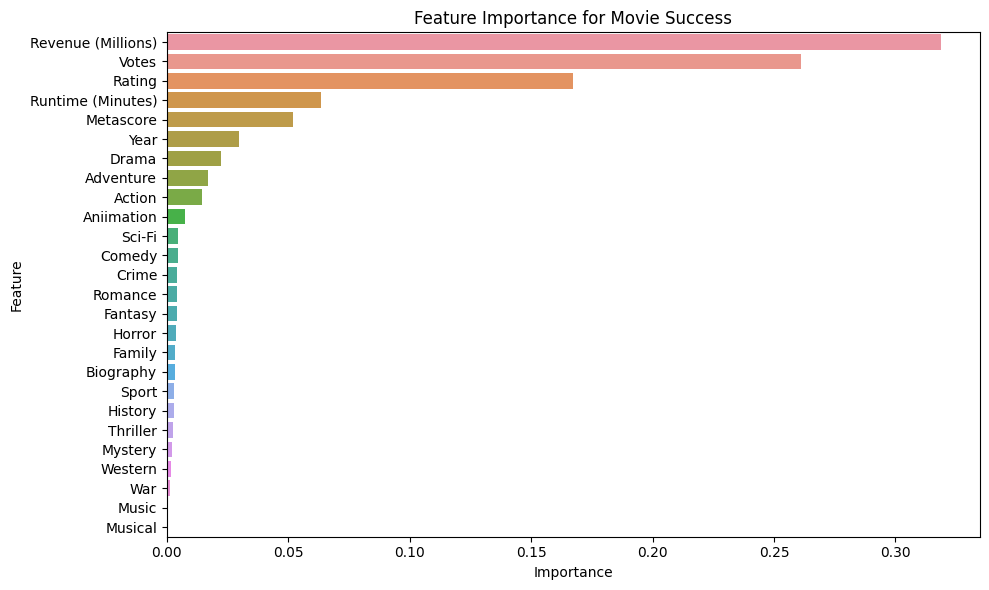

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

clf.fit(x_train, y_train)


feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Movie Success')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [17]:
log.score(x_test,y_test)

0.9404761904761905

In [18]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix(y_test,log.predict(x_test))

<Axes: >

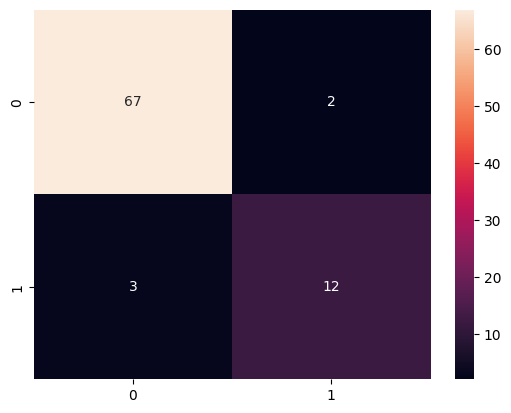

In [19]:
sns.heatmap(clf,annot=True)

# Some Data Optimisations

In [20]:
#normalising all columns
x_train_opt = x_train.copy()
x_test_opt = x_test.copy()

In [21]:
from sklearn.preprocessing import StandardScaler
x_train_opt = StandardScaler().fit_transform(x_train_opt)
x_test_opt = StandardScaler().fit_transform(x_test_opt)

In [22]:
#fitting again in Logistic Regression

In [23]:
log.fit(x_train_opt,y_train)

LogisticRegression()

In [24]:
log.score(x_test_opt,y_test)

0.9285714285714286

Lets Check other ML Technique to get higher accuracy!

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=40)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [26]:
kn.score(x_test,y_test)

0.9166666666666666

Lets Check other ML Technique to get higher accuracy!

# DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.9880952380952381

In [28]:
tree.score(x_train,y_train)

1.0

In [29]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix(y_test,tree.predict(x_test))

In [30]:
clf

array([[68,  1],
       [ 0, 15]])

<Axes: >

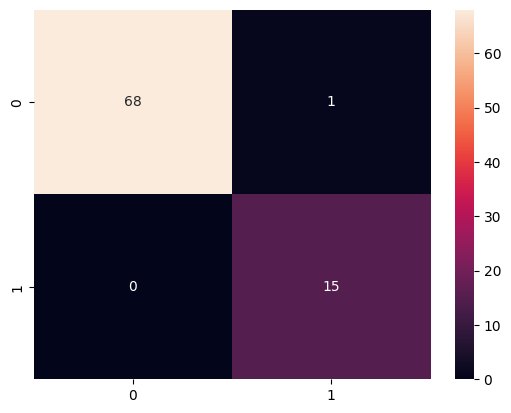

In [31]:
sns.heatmap(clf,annot=True)

In [50]:
# Example input data for prediction
new_movie_data = pd.DataFrame({
    'Year': [2023],
    'Runtime (Minutes)': [120],
    'Rating': [7.5],
    'Votes': [50000],
    'Revenue (Millions)': [100],
    'Metascore': [70],
    'Action': [1],
    'Adventure': [0],
    'Aniimation': [0],
    'Biography': [0],
    'Comedy': [1],
    'Crime': [0],
    'Drama': [0],
    'Family': [0],
    'Fantasy': [1],
    'History': [0],
    'Horror': [0],
    'Music': [0],
    'Musical': [0],
    'Mystery': [0],
    'Romance': [1],
    'Sci-Fi': [1],
    'Sport': [0],
    'Thriller': [1],
    'War': [0],
    'Western': [0]
})

new_movie_data_scaled = scaler.transform(new_movie_data)

# Using the trained model to predict
prediction = tree.predict(new_movie_data_scaled)
if prediction[0] == 1:
    print("The movie is predicted to be successful. The company should consider buying it based on ROI.")
else:
    print("The movie is predicted not to be successful. The company may want to reconsider buying it.")

The movie is predicted not to be successful. The company may want to reconsider buying it.


In [53]:
# Another Example input data for prediction
new_movie_data = pd.DataFrame({
    'Year': [2014],
    'Runtime (Minutes)': [121],
    'Rating': [8.1],
    'Votes': [757074],
    'Revenue (Millions)': [333.13],
    'Metascore': [76],
    'Action': [1],
    'Adventure': [1],
    'Aniimation': [0],
    'Biography': [0],
    'Comedy': [0],
    'Crime': [0],
    'Drama': [0],
    'Family': [0],
    'Fantasy': [0],
    'History': [0],
    'Horror': [0],
    'Music': [0],
    'Musical': [0],
    'Mystery': [0],
    'Romance': [0],
    'Sci-Fi': [1],
    'Sport': [0],
    'Thriller': [0],
    'War': [0],
    'Western': [0]
})

new_movie_data_scaled = scaler.transform(new_movie_data)

# Using the trained model to predict
prediction = tree.predict(new_movie_data_scaled)
if prediction[0] == 1:
    print("The movie is predicted to be successful. The company should consider buying it based on ROI.")
else:
    print("The movie is predicted not to be successful. The company may want to reconsider buying it.")


The movie is predicted to be successful. The company should consider buying it based on ROI.
